Title of the paper- Combinatorial Signal Perception in the BMP Pathway (2017)

INTRODUCTION


A beginner in biology comes across promiscuity of molecular interactions in biological systems as soon as one starts understanding the fundamental biochemical pathways of a cell. An ideal example to study the role of interaction promiscuity would be one that comprises multiple combinations of ligands or receptors. Bone Morphogenetic Protein (BMP) signalling is one such pathway that is befitting for such studies (Figure 1). 

In BMP pathway of mammals, there are around 20 ligands (Figure 1A) and two types of receptors (Figure 1B), i.e. Type 1 (BMPR1A, BMPR1B, ACVR1, and ALK1) and Type 2 (BMPR2, ACVR2A, and ACVR2B). The ligands form homo/hetero dimers with each other and a complex of receptors comprising two of each type 1 and type 2 receptors bind to the dimeric-ligand. These components interact in combinations and form numerous distinct receptor-ligand signalling complexes. These complexes phosphorylate secondary messengers (SMAD1, 5, and 8) (Figure 1C) which further regulates the target gene expression.



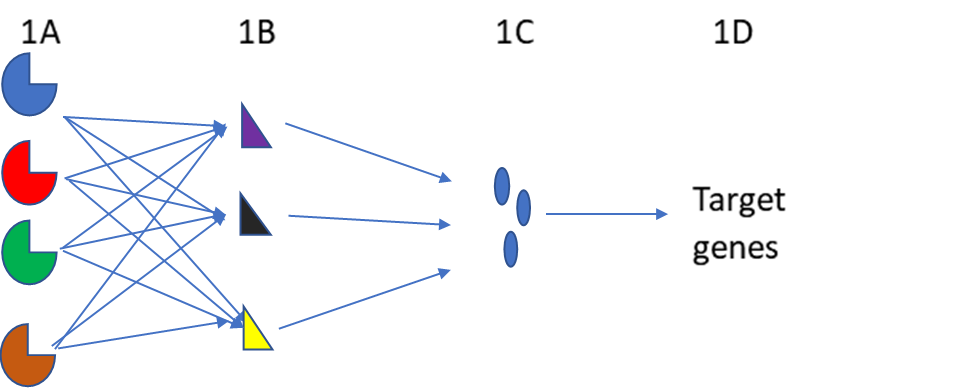

Figure 1. Promiscuous Receptor-Ligand interactions (A) Ligand variants (B) Receptors (Type 1 and type 2) (C) Secondary messengers (SMAD1/5/8) (D) Target genes



These interactions were understood to be redundant and that it just contributes to broadening the range of scope for regulation. However, through the study “Combinatorial Signal Perception in the BMP pathway” using experimental and mathematical modelling, it is shown that BMP Pathway perceives ligand combinations depending on both the ligand composition and relative concentrations of each ligand. On further studies, it is demonstrated how alternative receptor variants in combination with the same ligand can change its role in signal processing. The research article was published in the prestigious journal “Cell” and was cited 89 times as of 30/11/2020.

According to previous work, multiple interactions play a role in bringing about subtle control and flexibility in the regulation of genes[2]. Edson et al. in their work on ovarian tumour development and fertility established that BMP receptors can be redundant for one function and may bring in genetic variation in other aspects[3]. However, despite these specific studies, there was no bigger picture of how these distinct complexes allow the signal- processing, which is established by Antebi et al. through their experimental and mathematical models. The group showed that in BMP, the multi-ligand inputs could result in computations, including ratiometric sensing, balance detection, and imbalance detection. These computations are also dependent on the relative concentration of each ligand. Furthermore, the interaction of receptor variants with the same ligand and change in the level of receptor expression also showed variation in computation. 

I will be focusing on the studies performed to understand the role of promiscuous ligand-ligand interactions and the mathematical model developed for the same. For their experimental studies, they quantitively measured the BMP pathway activity in the presence of different ligand combinations using flow cytometry. A reporter cell line was constructed in which a fluorescent histone 2B (H2B)-Citrine was integrated whose expression is driven by BMP. The results of the study involving BMP4 ligand in combination with 15 other ligands (Figure 2) in pair challenged the existing notion on the role of promiscuous interactions. According to the observation, the combinations showed three distinct profiles of pathway activity i.e. additive (Figure 3A), ratiometric (Figure 3B) and imbalance response (Figure 3C).



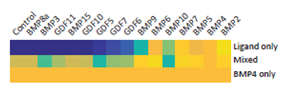


Figure 2: Interaction matrix of ligand combinations with BMP4 ligands  



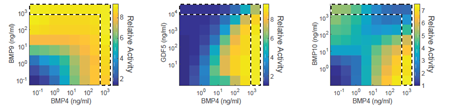

Figure 3: (A) Additive response   (B) Ratiometric response      (C) Imbalance response   


MODEL DEVELOPMENT

Antebi et al developed a mathematical model to understand the signalling actvity as a result of receptor-ligand promiscuity in pathways. The model is developed on the structure of BMP pathway but can be modified for other systems. This model takes in consideration the following- 
1.	Promiscuous ligand-receptor interactions, 
2.	Heterodimeric receptors (a simplified version of the natural Type I-Type II receptor tetramers),
3.	Variation in the activities of different signaling complexes. 
It does not takes into account the preliminary enzymatic processing of ligands, non-canonical signaling, downstream feedback loops (e.g., through SMAD6/7), and crosstalk with other signaling pathways.


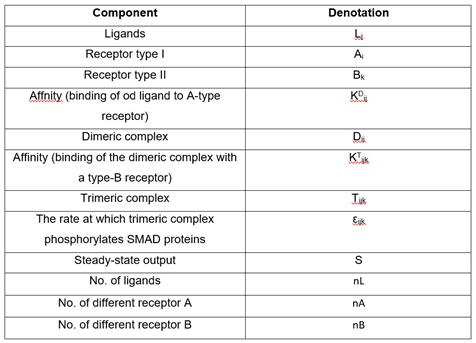

nL ligands, Lj , each of which bind to one of nA type A receptor subunits, Ai, to form nL*nA intermediate dimeric ligand-type A receptor complexes, Dij . These complexes in turn bind to one of nB type B receptor subunits, Bk , to form nL*nA*nB different trimeric signaling complexes, Tijk . 
Assumptions-
1.	Reactions are reversible
2.	Reactions follow first-order kinetics 
3.	Forward reaction rates - kD f ij and kT f ijk for the formation of dimeric and trimeric complexes, respectively, and with reverse reaction rates similarly given by kD r ij and kTr ijk . 

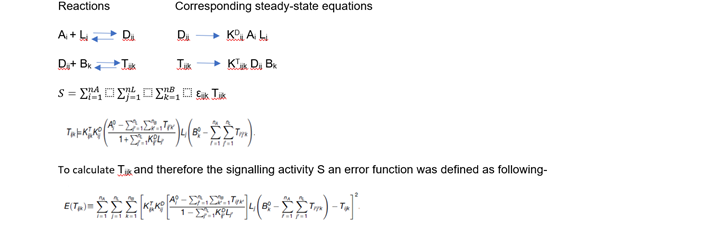

Simulations were performed for 100,000 random parameter sets, and the following plot was generated
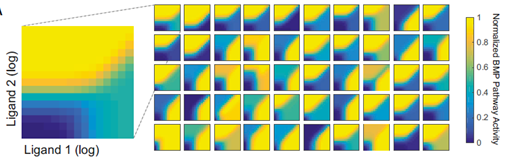

LEARNING OUTCOMES


With this notebook one can understand complexity of the molecular interactions Antebi et al observed through their experiments and model.

A comparison between the model outcome and experimental results shows the prediction credibility of the model.

This is notebook gives a chance to use multiple python libraries.








#Model development

In [1]:
import numpy as np


In [2]:
def gen_prm(iternum):
    A0 = np.power(10, np.random.uniform(-3, 3, [iternum,2]))                  #2 receptor expression level parameter A0 
    B0 = np.power(10, np.random.uniform(-3, 3, [iternum,2]))                  #2 receptor expression level parameter B0
    KA = np.random.rand(iternum,4);
    KA[:,1]=1-KA[:,0]; KA[:,3]=1-KA[:,2];                                     #KDij
    
    kb1 = np.random.rand(iternum,7)                                    
    kb2 = np.zeros((iternum,8))
    kb2[:,:-1] = kb1
    kb3 = np.ones((iternum,9))
    kb3[:,:-1] = kb2
    kb3.sort(axis=-1)
    
    #final KB
    KB = np.diff(kb3,axis=1)                                                   #KTijk
    
    E1 = np.random.rand(iternum,7)
    E2 = np.zeros((iternum,8))
    E2[:,:-1] = E1
    E3 = np.ones((iternum,9))
    E3[:,:-1] = E2
    E3.sort(axis=-1)
    
    #final E
    E = np.diff(E3,axis=1)
    zero_matrix = np.zeros((iternum,1))                                         #εijk
    
    #return(np.array([A0,B0,KA,KB,E,zero_matrix]))
    return(np.concatenate((A0,B0,KA,KB,E,zero_matrix),axis = 1))

In [ ]:
import scipy as spy
from scipy.optimize import least_squares


In [ ]:
def solve_model_twostep(L0, A0, B0, kA, kB, e):
    
    
    
    A0 = A0[np.newaxis]
    nA = np.size(A0)
    nL = np.size(L0)
    nB = np.size(B0)
    A = np.reshape(A0, (nA, 1, 1))
    L = np.reshape(L0, (1, nL, 1))
    B = np.reshape(B0, (1, 1, nB))
    kA = np.reshape(kA, (nA, nL, 1))
    kB = np.reshape(kB, (nA, nL, nB))
    
    constraint_A = np.zeros((nA + nB, nA * nL * nB))
    for i in range(nA):
        constraint_A[i, i:nA:(nA * nL * nB)] = 1

    for k in range(nB):
        constraint_A[nA + k, (nA * nL) * (k - 1) + 1:(nA * nL) * k] = 1

    constraint_b = np.transpose([A0, B0])
    
    
    #Set initial guess
    
    x0 = np.minimum(np.divide(np.tile(A, (1, nL, nB)), nL * nB), np.divide(np.tile(B, (nA, nL, 1)), nA * nL))
    x0_temp = x0.flatten()
    x0 = x0_temp.T

    def model_error(T):
   
       
        x_A = np.transpose(A0) - np.matmul(constraint_A[:nA-1, :], T)
        x_A = np.divide(x_A, 1 + np.multiply(kA[:][:][0], np.transpose(L0)) )
        x_A = np.tile(np.reshape(x_A, (nA, 1, 1)), (1, nL, nB))
        x_L = np.tile(L, (nA, 1, nB))
        x_B = np.transpose(B0) - np.matmul(constraint_A[nA + 1:nA + nB, :], T);
        x_B = np.tile(np.reshape(x_B, (1, 1, nB)), (nA, nL, 1));
        x_kA = np.tile(kA, (1, 1, nB));

        ## Tijk = kijk * kij * Ai * Lj * Bk
        est_T = np.multiply(np.multiply(np.multiply(np.multiply(kB, x_kA), x_A), x_L), x_B)
        errors = est_T.flatten() - T

        return(errors)

    #minimizing the error function
    Res1 = least_squares(model_error, x0, bounds = (0,np.inf))
    X = Res1.x
    error = Res1.cost
    activity = np.matmul(e,Res1.x)
    ac = list([activity,error])
    cc = np.array(ac)
    return activity 
    

In [ ]:
#Import statements
import scipy as spy
from scipy.optimize import least_squares

In [ ]:
#Model_run_code
iternum=1
NL=15

allprm = gen_prm(iternum)

#Simulate 2D responses
Xconc = np.logspace(-3,3,NL)
Yconc = np.logspace(-3,3,NL)

allmat=np.zeros((iternum,NL**2))

for n in range(iternum):
    print('\n', n)

    p = allprm[n,:]
    mtx = np.zeros((15,15))
  
    for xlig in range(15):
        for ylig in range(15):
            
            res = solve_model_twostep(np.array([[Xconc[xlig], Yconc[ylig]]]), p[0:2], p[2:4], p[4:8], p[8:16], p[16:24])
            mtx[xlig][ylig] = res
    
    mt = mtx.flatten()
    allmat[n,:] = mt[:]
    
    


 0


In [ ]:
mtx

array([[2.23124789e-04, 4.88537470e-04, 1.19915988e-03, 3.09259255e-03,
        8.09655424e-03, 2.10061874e-02, 5.23399229e-02, 1.18640388e-01,
        2.28261423e-01, 3.56615650e-01, 4.21054031e-01, 4.18539870e-01,
        4.15094975e-01, 4.14157109e-01, 4.13891206e-01],
       [3.32221184e-04, 5.97496100e-04, 1.30762481e-03, 3.20168465e-03,
        8.20356653e-03, 2.11063634e-02, 5.24207805e-02, 1.18680192e-01,
        2.28217871e-01, 3.56508636e-01, 4.21120555e-01, 4.18610179e-01,
        4.15123353e-01, 4.14167464e-01, 4.13895032e-01],
       [6.24776603e-04, 8.89683036e-04, 1.59882268e-03, 3.49016709e-03,
        8.48814474e-03, 2.13720022e-02, 5.26414040e-02, 1.18787601e-01,
        2.28111871e-01, 3.56220729e-01, 4.21295774e-01, 4.18800148e-01,
        4.15199391e-01, 4.14195497e-01, 4.13905340e-01],
       [1.40879146e-03, 1.67270852e-03, 2.37922104e-03, 4.26352008e-03,
        9.24266433e-03, 2.20841212e-02, 5.32288814e-02, 1.19091536e-01,
        2.27841592e-01, 3.55443590e-0

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


Text(33.0, 0.5, 'Ligand 2(log)')

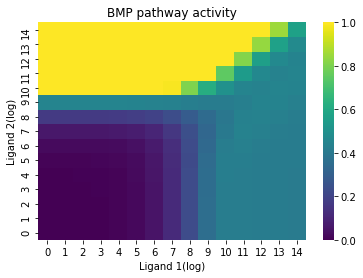

In [ ]:

plt.title('BMP pathway activity')
ax= sns.heatmap(mtx, vmin=0, vmax=1, cmap='viridis')
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
plt.xlabel('Ligand 1(log)')
plt.ylabel('Ligand 2(log)')

Different biochemical parameter sets will generate a range of 2-ligand integration functions. 

I plotted the steady-state response for 15 randomly selected parameter sets. 

Analysis of the plot-

On dissecting the graph further it shows additive, ratiometric, and imbalance response patterns which were also observed in their experimental setups (Figure 3).



REFERENCES

[1]	Y. E. Antebi et al., “Combinatorial Signal Perception in the BMP Pathway,” Cell, vol. 170, no. 6, pp. 1184-1196.e24, Sep. 2017.


[2]	M. Llimargas and P. A. Lawrence, “Seven Wnt homologues in Drosophila: A case study of the developing tracheae,” Proc. Natl. Acad. Sci. U. S. A., vol. 98, no. 25, pp. 14487–14492, Dec. 2001.


[3]	M. A. Edson et al., “Granulosa cell-expressed BMPR1A and BMPR1B have unique functions in regulating fertility but act redundantly to suppress ovarian tumor development,” Mol. Endocrinol., vol. 24, no. 6, pp. 1251–1266, Jun. 2010.

Acknowledgements


A big thank you to-

Dr. Umulis

Yaron E Antebi

Priya Garg
